## Иерархическая кластеризация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv('food.txt', sep = ' ')
df.head()

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


Приведем признаки к единой шкале

перенесу все мои объекты с признаками в некоторую матрицу X. 

In [3]:
X = df.iloc[:, 1:].values
X

array([[340. ,  20. ,  28. ,   9. ,   2.6],
       [245. ,  21. ,  17. ,   9. ,   2.7],
       [420. ,  15. ,  39. ,   7. ,   2. ],
       [375. ,  19. ,  32. ,   9. ,   2.6],
       [180. ,  22. ,  10. ,  17. ,   3.7],
       [115. ,  20. ,   3. ,   8. ,   1.4],
       [170. ,  25. ,   7. ,  12. ,   1.5],
       [160. ,  26. ,   5. ,  14. ,   5.9],
       [265. ,  20. ,  20. ,   9. ,   2.6],
       [300. ,  18. ,  25. ,   9. ,   2.3],
       [340. ,  20. ,  28. ,   9. ,   2.5],
       [340. ,  19. ,  29. ,   9. ,   2.5],
       [355. ,  19. ,  30. ,   9. ,   2.4],
       [205. ,  18. ,  14. ,   7. ,   2.5],
       [185. ,  23. ,   9. ,   9. ,   2.7],
       [135. ,  22. ,   4. ,  25. ,   0.6],
       [ 70. ,  11. ,   1. ,  82. ,   6. ],
       [ 45. ,   7. ,   1. ,  74. ,   5.4],
       [ 90. ,  14. ,   2. ,  38. ,   0.8],
       [135. ,  16. ,   5. ,  15. ,   0.5],
       [200. ,  19. ,  13. ,   5. ,   1. ],
       [155. ,  16. ,   9. , 157. ,   1.8],
       [195. ,  16. ,  11. ,  14

вычту из этой матрицы средние значения по всем признакам и поделю на стандартные отклонения тоже по всем признакам отдельно. 

In [4]:
X = (X - X.mean(axis = 0)) / X.std(axis = 0)

In [5]:
X.mean(axis = 0)

array([-9.45745539e-17,  0.00000000e+00,  6.57909941e-17,  3.70074342e-17,
        1.38777878e-16])

In [6]:
X.std(axis = 0)

array([1., 1., 1., 1., 1.])

In [7]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [8]:
Z = linkage(X, method = 'average', metric = 'euclidean')
Z

array([[ 0.        , 10.        ,  0.06973555,  2.        ],
       [11.        , 12.        ,  0.18939102,  2.        ],
       [ 6.        , 25.        ,  0.21915945,  2.        ],
       [27.        , 28.        ,  0.30727276,  4.        ],
       [ 1.        ,  8.        ,  0.4202579 ,  2.        ],
       [ 3.        , 30.        ,  0.46944434,  5.        ],
       [ 4.        , 14.        ,  0.75192779,  2.        ],
       [ 9.        , 32.        ,  0.76245033,  6.        ],
       [20.        , 22.        ,  0.78097139,  2.        ],
       [ 5.        , 15.        ,  0.79940943,  2.        ],
       [18.        , 19.        ,  0.80176192,  2.        ],
       [13.        , 31.        ,  0.91274454,  3.        ],
       [21.        , 23.        ,  0.94966792,  2.        ],
       [16.        , 17.        ,  1.08097041,  2.        ],
       [29.        , 36.        ,  1.19666723,  4.        ],
       [33.        , 38.        ,  1.31763478,  5.        ],
       [35.        , 37.

В результате в переменной Z мы имеем следующую табличку из четырех столбцов. Первые два столбца содержат в себе индексы объектов, которые на этом шаге будут объединяться. Третий столбец содержит расстояние, на котором эти два объекта будут объединяться. И, наконец, четвертый столбец показывает нам, какой размер кластера получится после объединения на этом шаге.

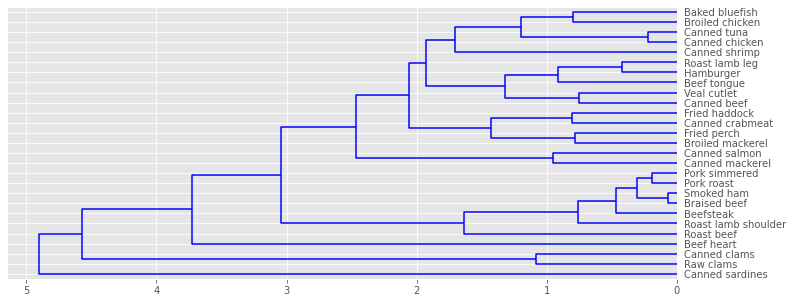

In [10]:
dend = dendrogram(Z, orientation='left', color_threshold=0.0, labels=df.Name.values)

хотелось бы из всей этой иерархии получить разбиение на кластеры. Для этого мы будем использовать метод fcluster. Ему мы опять же подаем переменную Z, и далее нам нужно указать критерий, по которому мы хотим отобрать кластеры. Есть несколько способов это сделать, но наиболее популярный из них — это либо в явном виде указать количество кластеров, которое мы хотим получить, либо, смотря на дендрограмму, определить порог отсечения, и по этому порогу нам вернутся метки тех кластеров, которые еще не успели объединиться вместе. Н

In [11]:
label = fcluster(Z, 2.2, criterion='distance')

In [12]:
np.unique(label)

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [13]:
df.loc[:, 'label'] = label

In [14]:
for i, group in df.groupby('label'):
    print('=' * 10)
    print('cluster {}'.format(i))
    print(group)

cluster 1
            Name  Energy  Protein  Fat  Calcium  Iron  label
16     Raw clams      70       11    1       82   6.0      1
17  Canned clams      45        7    1       74   5.4      1
cluster 2
                   Name  Energy  Protein  Fat  Calcium  Iron  label
0          Braised beef     340       20   28        9   2.6      2
2            Roast beef     420       15   39        7   2.0      2
3             Beefsteak     375       19   32        9   2.6      2
9   Roast lamb shoulder     300       18   25        9   2.3      2
10           Smoked ham     340       20   28        9   2.5      2
11           Pork roast     340       19   29        9   2.5      2
12        Pork simmered     355       19   30        9   2.4      2
cluster 3
               Name  Energy  Protein  Fat  Calcium  Iron  label
21  Canned mackerel     155       16    9      157   1.8      3
23    Canned salmon     120       17    5      159   0.7      3
cluster 4
                Name  Energy  Protein  Fa